# Проект по анализу данных и машинному обучению на базе данных Twitter

### Елизавета Соколенко, Дарья Жарикова и Майя Короткая

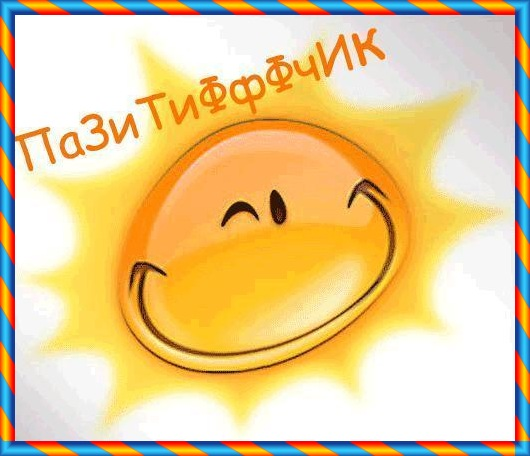

In [1]:
from IPython.display import Image
Image(filename='pos.jpg', width=700)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import nltk
from nltk.corpus import stopwords
import string
rus_stopwords = set(stopwords.words("russian"))
from sklearn import model_selection, metrics
import xgboost as xgb
%matplotlib inline
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

## Подготовка данных и визуализация

In [3]:
col = ['id_post', 'date', 'author_name', 'text', 'type', 'reply', 'retw', 'fav', 'sum', 'fol', 'frien', 'listcount']

In [4]:
pos = pd.read_table("positive.csv", sep=';', encoding='UTF-8')
neg = pd.read_table("negative.csv", sep=';', encoding='UTF-8')

In [5]:
pos.columns = col
neg.columns = col

In [6]:
data = pd.concat([pos, neg])

In [174]:
data

,id_post,date,author_name,text,type,reply,retw,fav,sum,fol,...,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len,num_bad_words,num_happy_smiles,num_sad_smiles
0,424063181154447360,1389939515,olololenka,"Меня очень деликатно хакнули, твит раз в час :(",-1,0,0,0,2108,43,...,9,47,3,3,0,1,4.333333,0,0,1
1,410297020721946624,1386657407,vadim_vadimich,"@Deathverge спасибо большое, я тоже по всем оч...",1,0,0,0,24395,1102,...,10,59,3,4,0,1,5.000000,0,1,0
2,413929130863099904,1387523369,ar10_07,"У тебя есть друзья, с которыми ты познакомился...",-1,0,0,0,2549,162,...,20,136,8,11,1,1,5.850000,0,0,1
3,410046375993167872,1386597648,Yana5_5_5,"ооо, это чувство, когда ты за весь день оказыв...",1,0,0,0,2747,45,...,12,67,4,3,0,0,4.666667,0,1,0
4,419017561423249408,1388736546,quinachairy,"Не люблю спать в своей комнате, ибо какой-то б...",-1,0,0,0,3826,53,...,12,67,3,4,0,1,4.666667,0,0,1
5,410007738660294656,1386588437,vladisfun,"Вернулся.. Скоро сессия, весь негатив буду сюд...",1,0,0,0,45,3,...,9,58,0,4,1,3,5.555556,0,1,0
6,413727124193685504,1387475207,mukhitdinovaa,@petit_chablis надеюсь меня? а то что-то я сов...,-1,0,0,0,7977,376,...,9,58,4,6,0,0,5.555556,0,0,1
7,412902013572104192,1387278486,MILKA_LOL_,"@Boo_Ohoo я самокритичен, я днище тихоокеанско...",-1,0,0,0,6301,460,...,6,58,2,6,0,1,7.428571,0,0,0
8,424238269338255360,1389981260,Podslychanoilli,"она в сети,а сообщения мои не читает...и вот п...",-1,0,0,0,40,276,...,14,83,4,7,0,1,5.000000,0,0,1
9,412234754155872256,1387119399,dmangelina,"На фото улыбаюсь, а плакать так хочется :( htt...",-1,0,0,0,9605,243,...,9,65,3,8,0,1,6.333333,0,0,1


In [7]:
data = data.sample(frac=1).reset_index(drop=True)

In [8]:
data.shape[0]

226832

/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


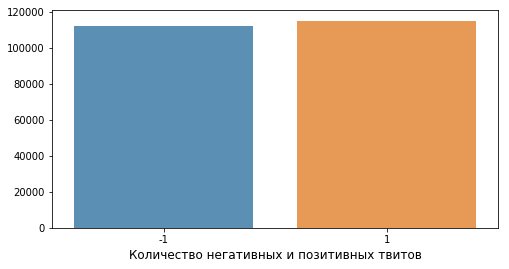

In [18]:
cnt_srs = data['type'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Количество негативных и позитивных твитов', fontsize=12)
plt.show()

In [7]:
text_pos = ' '.join(text_pos1)

In [8]:
text_neg1 = neg['text']
text_neg = ' '.join(text_neg1)

In [9]:
import re
from stop_words import get_stop_words
import pymorphy2
from collections import Counter
morph = pymorphy2.MorphAnalyzer()


def count(text):
    #punct = re.compile('[\d!\]\,?\[№:)(».\*\—;"$>=</\«\n]')
    #result = re.sub(punct,'', text)
    r = re.compile("[а-яА-Я]+")
    result = r.findall(text)
    all_words = []
    ru_stop = get_stop_words('ru')
    new = [i for i in result if not i in ru_stop]
    for word in new:
        word = morph.parse(word)[0].normal_form
        if word!= 'ещ' and word!= 'вс' and word!= 'х' and word!= 'ахи' and word!= '' and word not in ru_stop:
            all_words.append(word)
    c = Counter(all_words)
    return c.most_common()

In [10]:
count_pos = count(text_pos)

In [11]:
count_neg = count(text_neg)

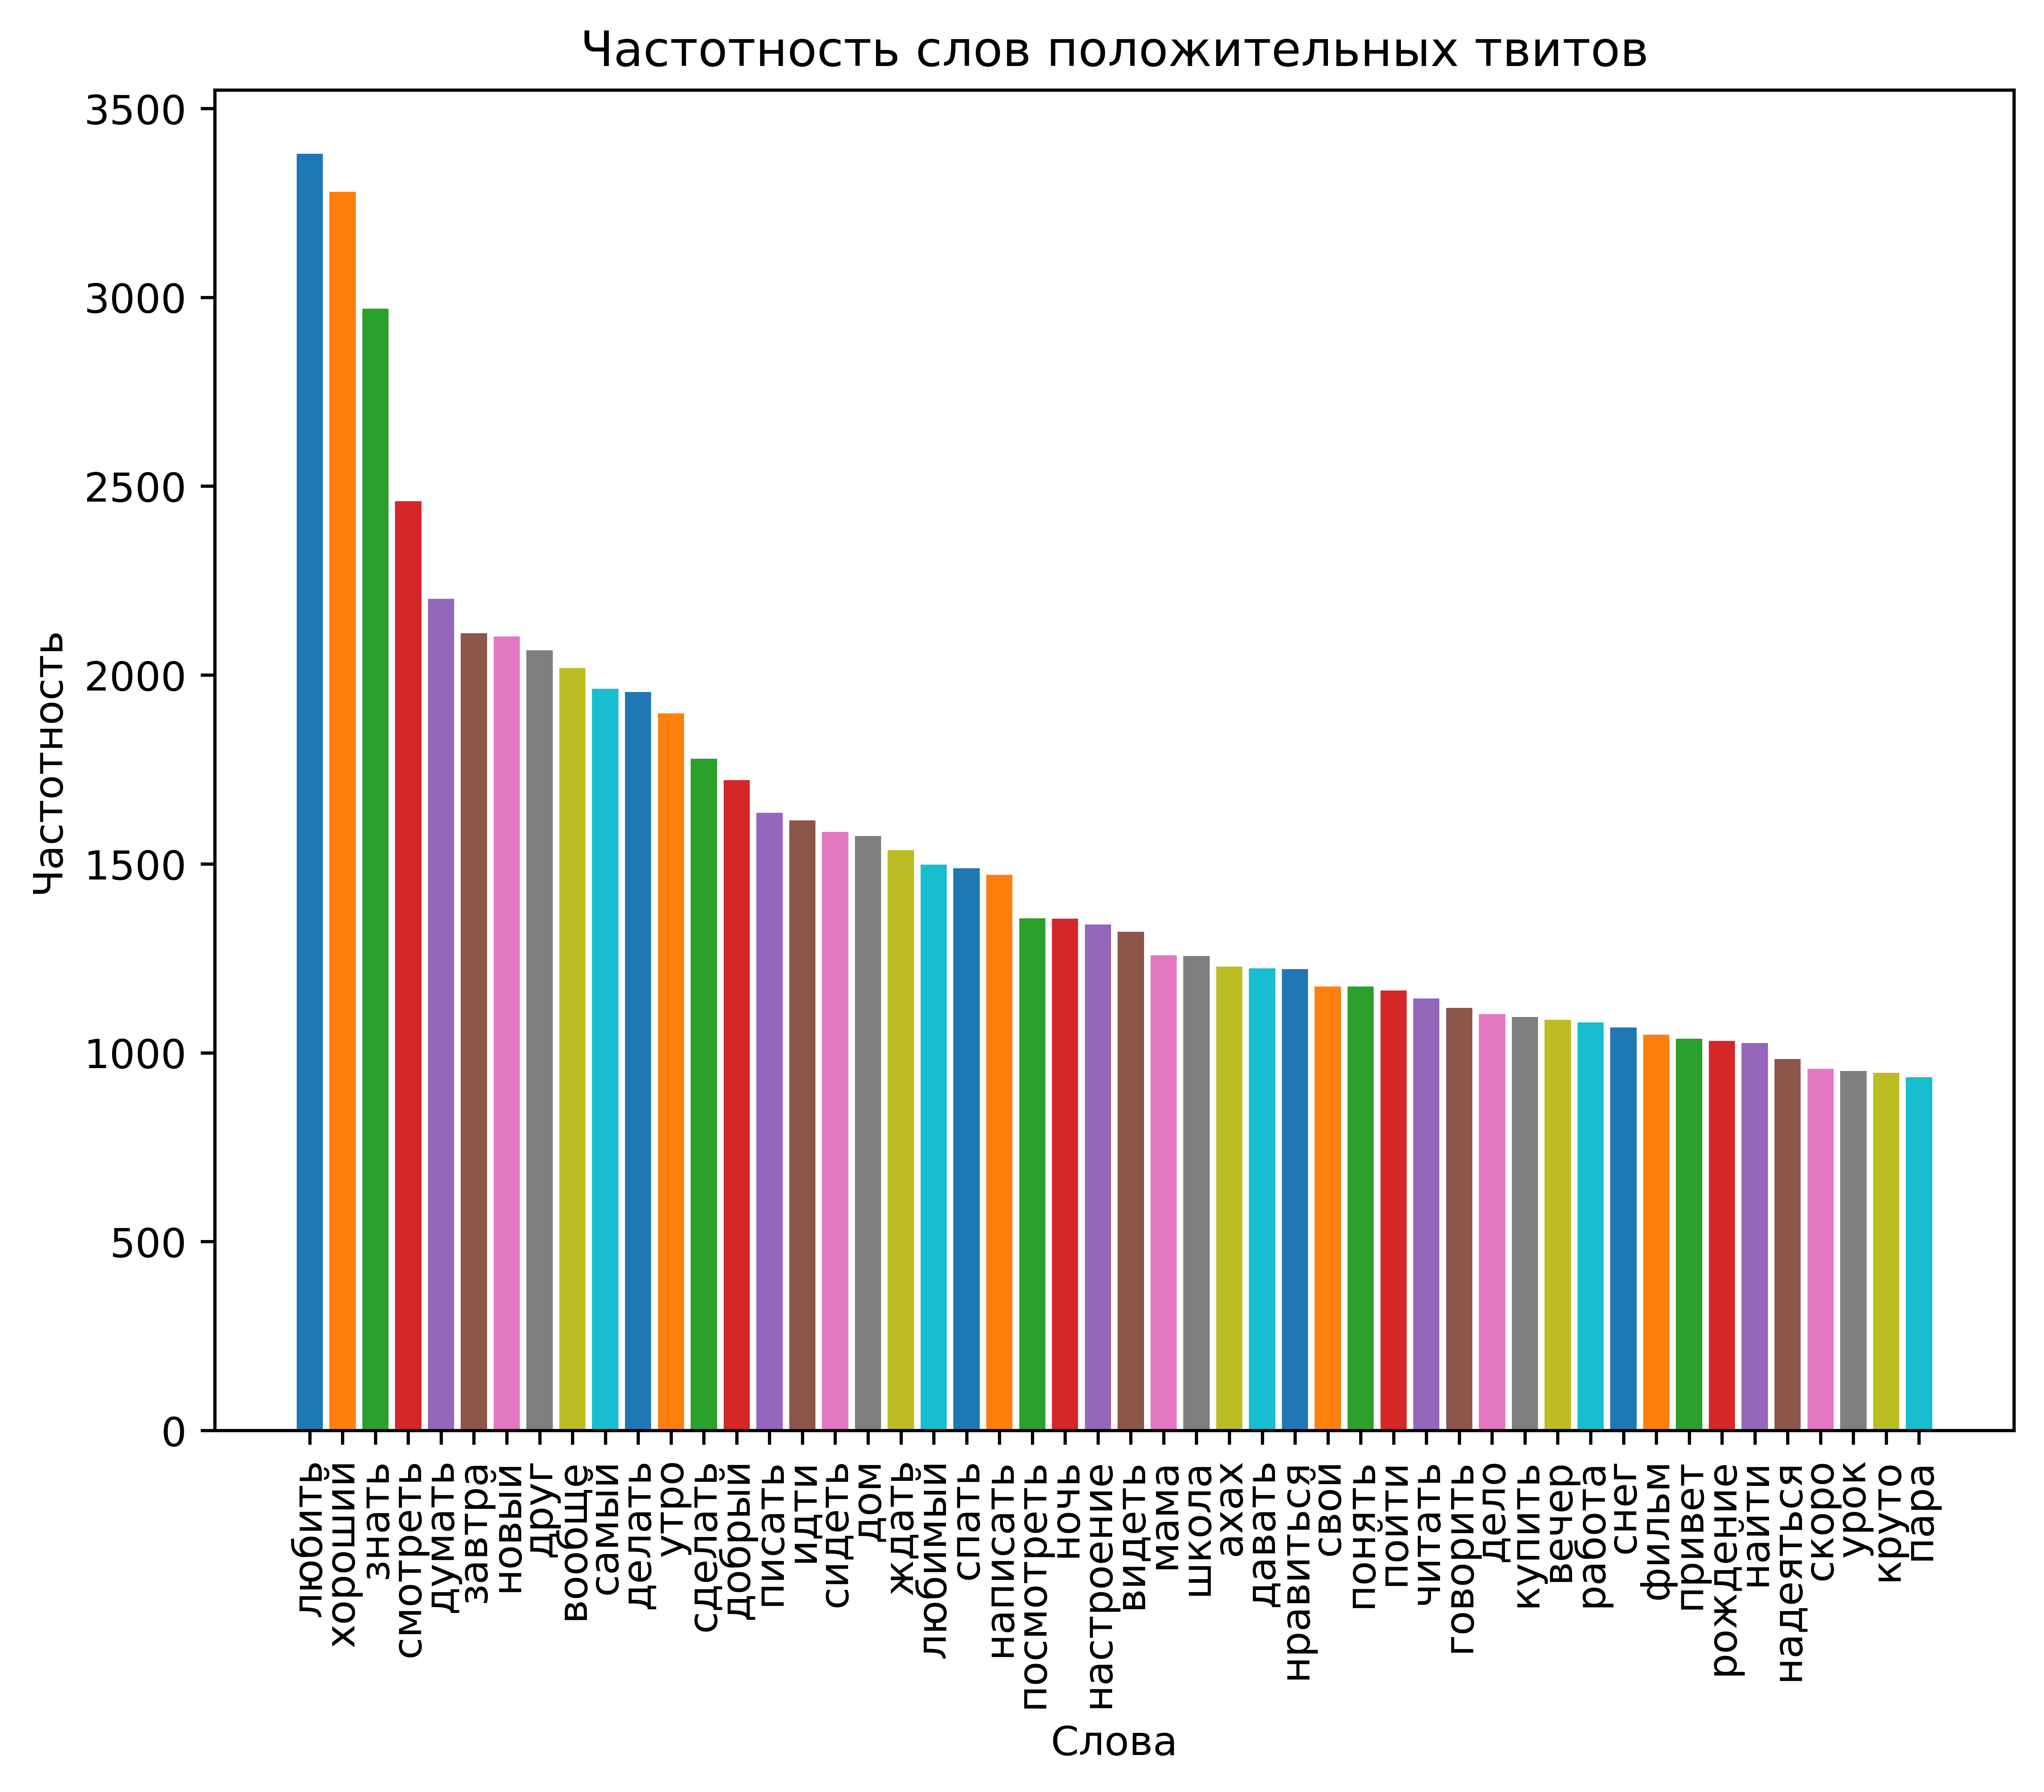

In [13]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

for elem in count_pos[:50]:
    plt.bar(elem[0], int(elem[1]))
    plt.xticks(rotation='vertical')
plt.xlabel('Слова')
plt.ylabel('Частотность')
plt.title('Частотность слов положительных твитов')

plt.show()

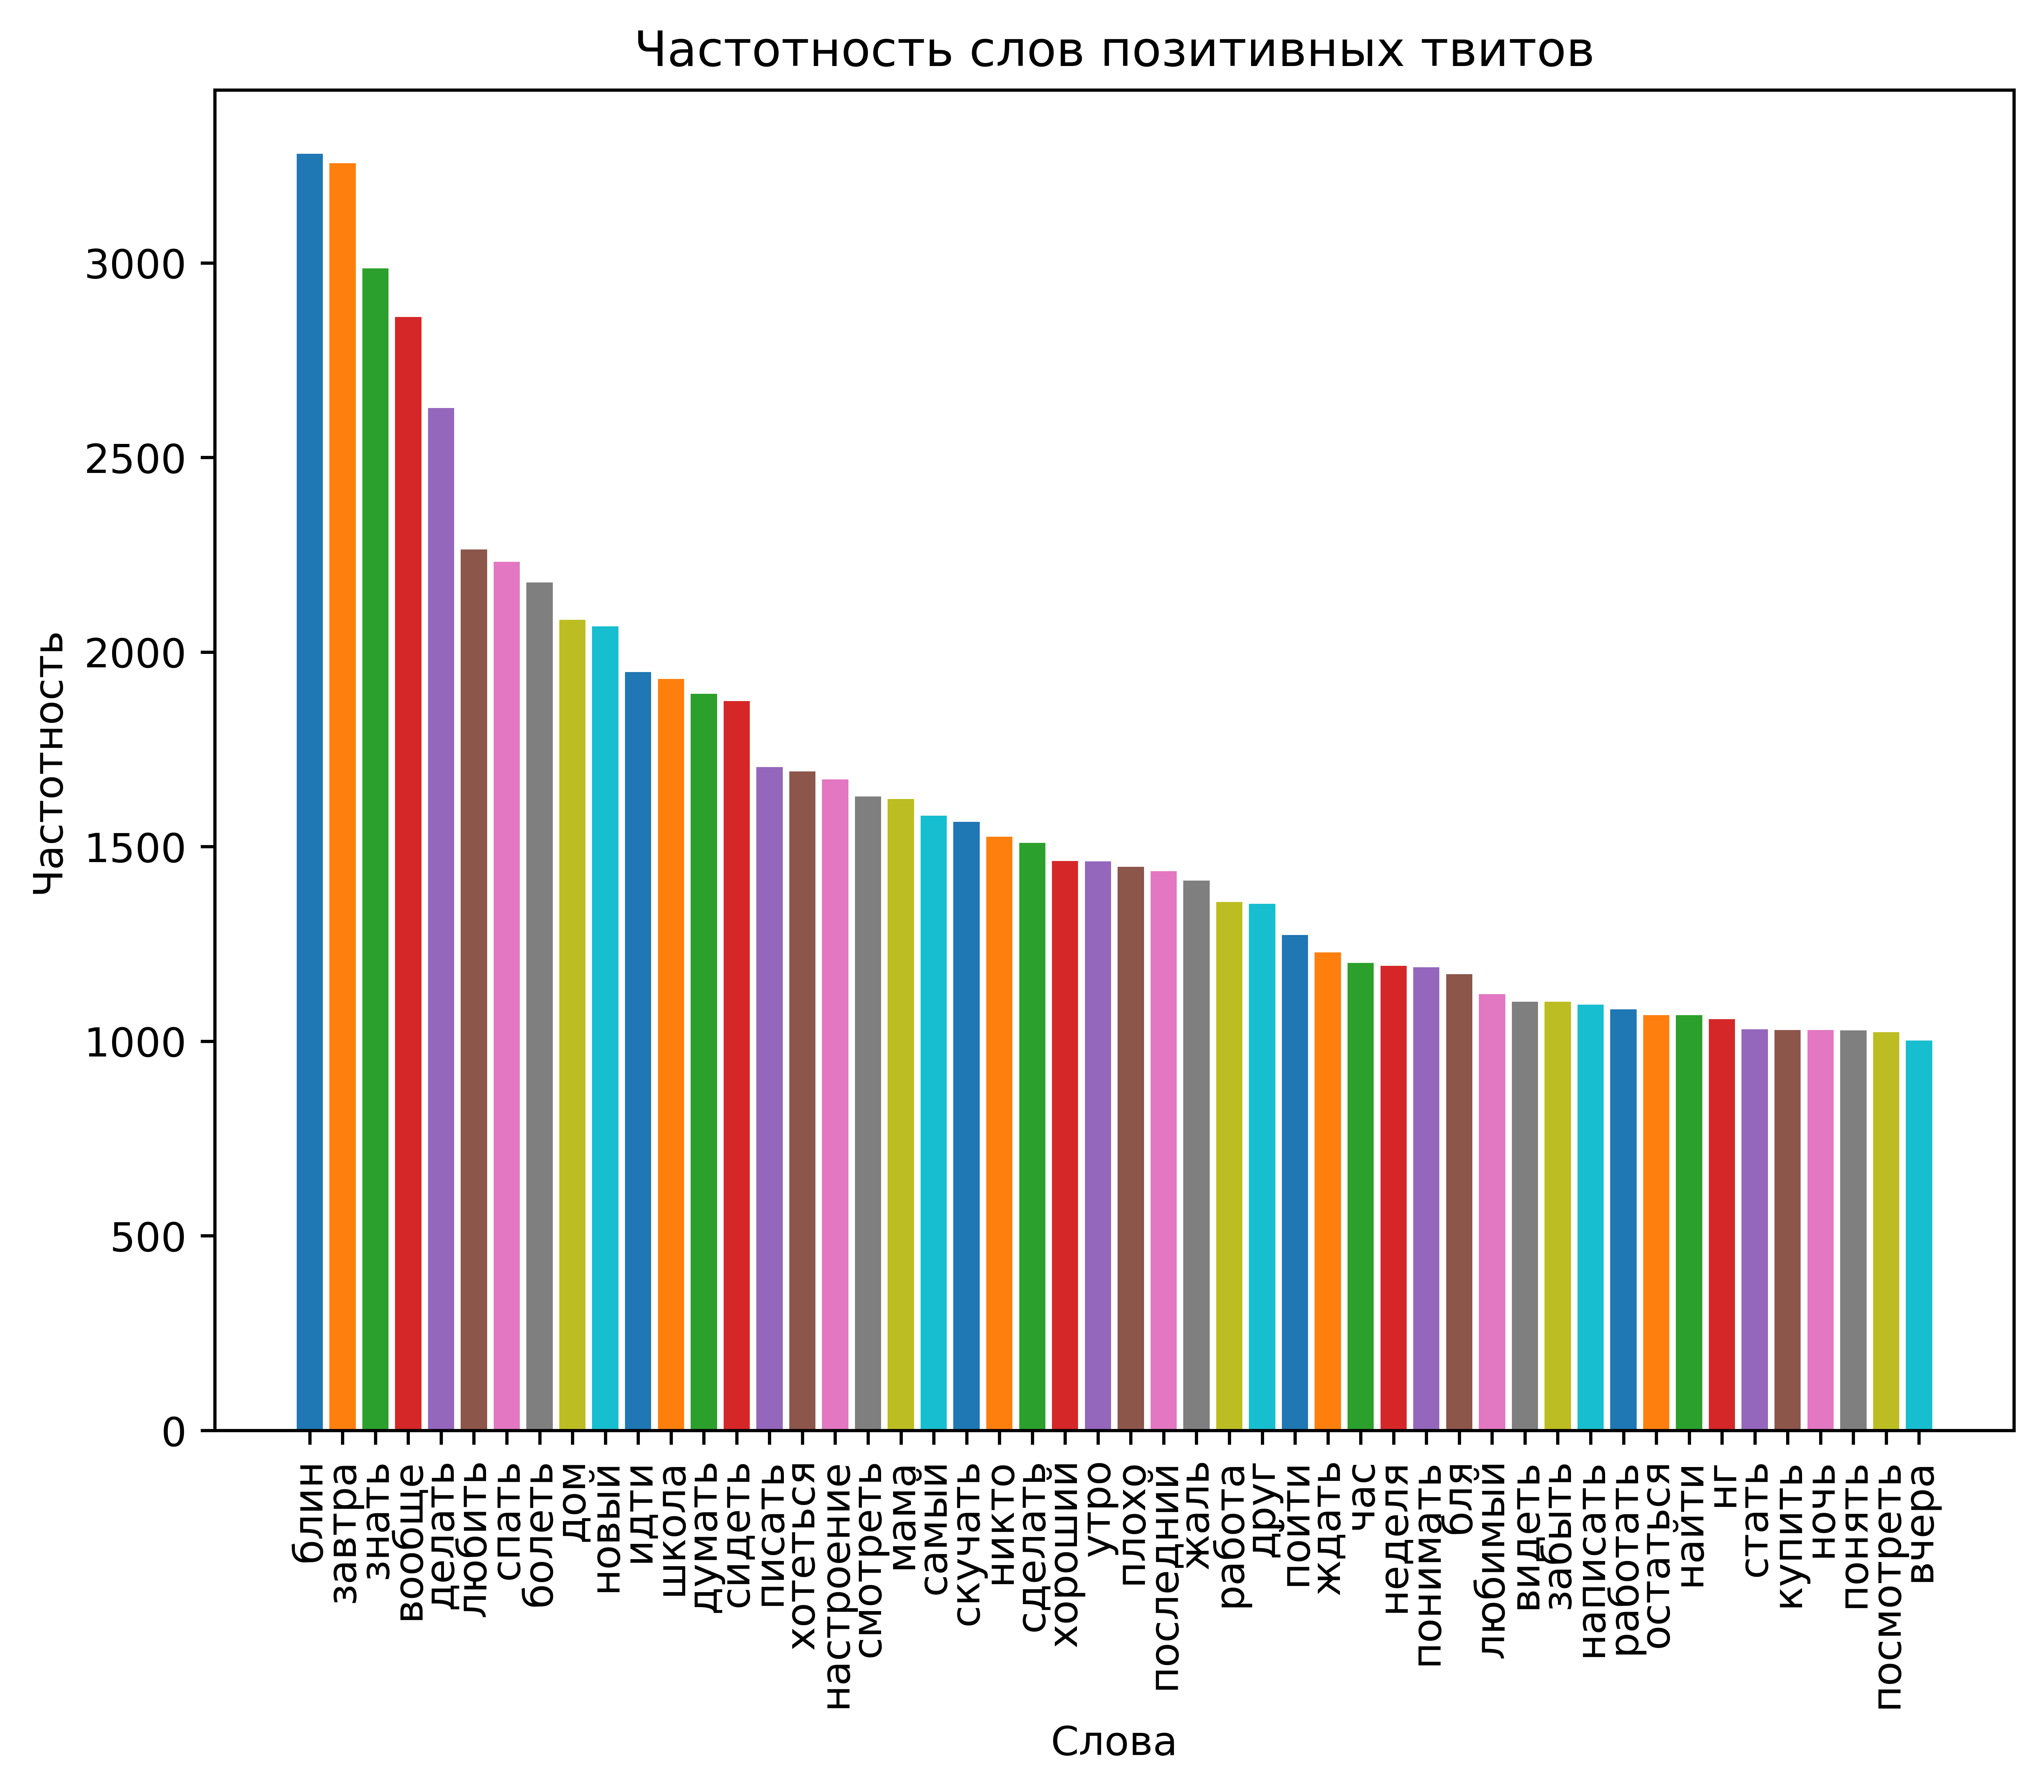

In [40]:
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

for elem in count_neg[:50]:
    plt.bar(elem[0], int(elem[1]))
    plt.xticks(rotation='vertical')
plt.xlabel('Слова')
plt.ylabel('Частотность')
plt.title('Частотность слов отрицательных твитов')

plt.show()

In [14]:
def mean(feature):
    m = 0
    for el in feature:
        m+=el
    m = m/len(feature)
    return m

In [15]:
friends_pos = mean(pos['frien'])
friends_neg = mean(neg['frien'])
retw_neg = mean(neg['retw'])
retw_pos = mean(pos['retw'])
fav_pos = mean(pos['fav'])
fav_neg = mean(neg['fav'])
sum_pos = mean(pos['sum'])
sum_neg = mean(neg['sum'])
fol_pos = mean(pos['fol'])
fol_neg = mean(neg['fol'])

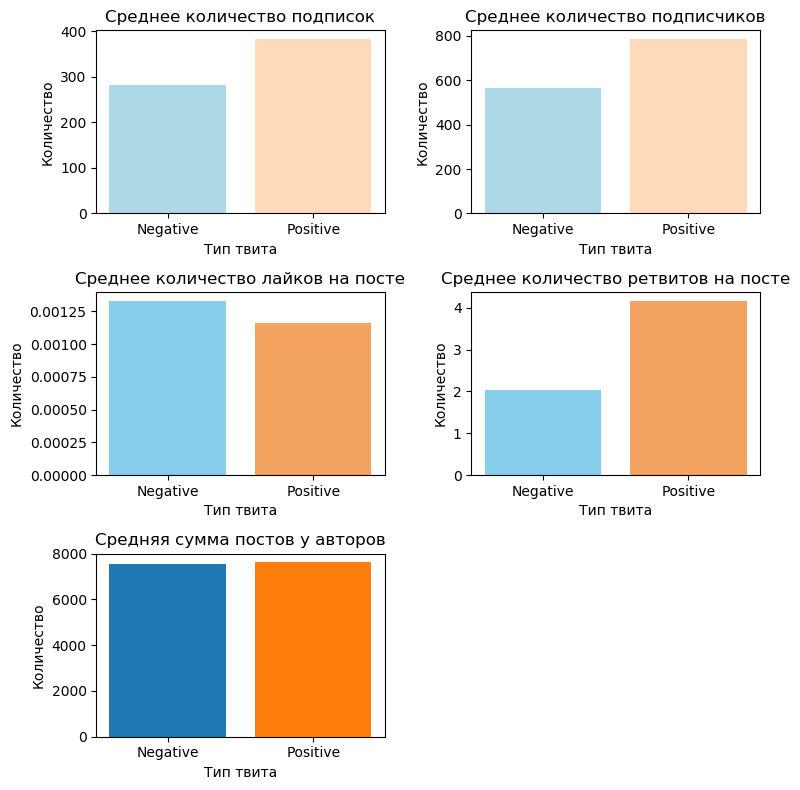

In [26]:
fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(8)


obj = ['Negative', 'Positive']
# friends
#fig.add_subplot(321)
plt.subplot(321)
plt.bar(obj[0], friends_neg, color='lightblue')
plt.bar(obj[1], friends_pos, color='peachpuff')
plt.title('Среднее количество подписок')
plt.xlabel('Тип твита')
plt.ylabel('Количество')

# followers
#fig.add_subplot(222)
plt.subplot(322)
plt.bar(obj[0], fol_neg, color='lightblue')
plt.bar(obj[1], fol_pos, color='peachpuff')
plt.title('Среднее количество подписчиков')
plt.xlabel('Тип твита')
plt.ylabel('Количество')
plt.tight_layout(w_pad=3)

# лайки
#fig.add_subplot(223)
plt.subplot(323)
plt.bar(obj[0], fav_neg, color='skyblue')
plt.bar(obj[1], fav_pos, color='sandybrown')
plt.title('Среднее количество лайков на посте')
plt.xlabel('Тип твита')
plt.ylabel('Количество')
plt.tight_layout(w_pad=2)


# ретвиты
#fig.add_subplot(224)
plt.subplot(324)
plt.bar(obj[0], retw_neg, color='skyblue')
plt.bar(obj[1], retw_pos, color='sandybrown')
plt.title('Среднее количество ретвитов на посте')
plt.xlabel('Тип твита')
plt.ylabel('Количество')
plt.tight_layout(w_pad=2)


#сумма
plt.subplot(325)
plt.bar(obj[0], sum_neg)
plt.bar(obj[1], sum_pos)
plt.title('Средняя сумма постов у авторов')
plt.xlabel('Тип твита')
plt.ylabel('Количество')
plt.tight_layout(w_pad=2)

plt.show()




In [9]:
#дашины функции
bad_words_parts = ['хуев','хуёв','скот','хер','пизд','ебал','гондон','гандон','гнид','манда','мраз','суч','ублюд','шалав','шмар','ебан','уеб','уёб','херн','бляд','хуй','говн','дерьм','залуп','кобел','мудил', 'ссан', 'бляя', 'сука', 'блля','хуя','пизд']

def bad(stroka):
    stroka = "".join(l for l in stroka if l not in string.punctuation)
    stroka = "".join(l for l in stroka if l not in ['D', 'B', 'X', 'x', 'P', 'C'])
    res = 0
    for w in stroka.split():
        if w == 'бля':
            res +=1
        for el in bad_words_parts:
            str_find=''
            for l in el:
                str_find = str(str_find+l+'+')
            find = re.findall(r'{}'.format(str_find), w)
            if len(find) != 0:
                res +=1
    return res

def happy_smiles(text):
    if ')' in text:
        num = 1
    else:
        others = re.findall(r'[:;]+[-=]*[DзЗ3]+', text)
        if len(others) == 0:
            num = 0
        else:
            num = 1
    return num

def sad_smiles(text):
    if '(' in text:
        num = 1
    else:
        others = re.findall(r'[:;]+[-=]*[cCсС]+', text)
        if len(others) == 0:
            num = 0
        else:
            num = 1
    return num

/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


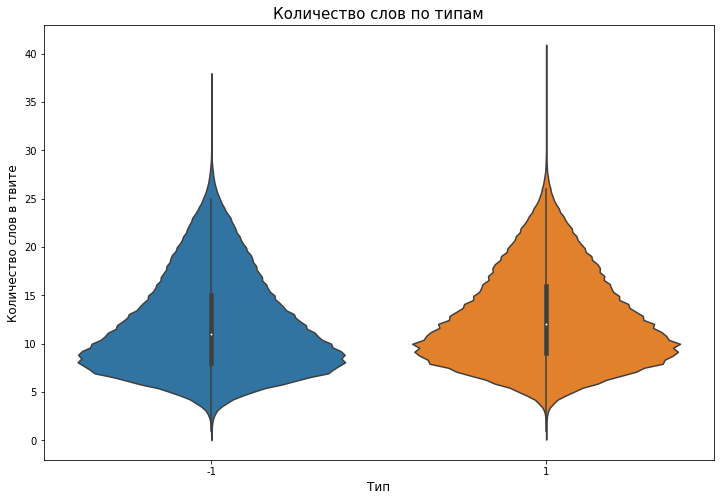

In [23]:
data['num_words'].loc[data['num_words']>80] = 80 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.violinplot(x='type', y='num_words', data=data)
plt.xlabel('Тип', fontsize=12)
plt.ylabel('Количество слов в твите', fontsize=12)
plt.title("Количество слов по типам", fontsize=15)
plt.show()

/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


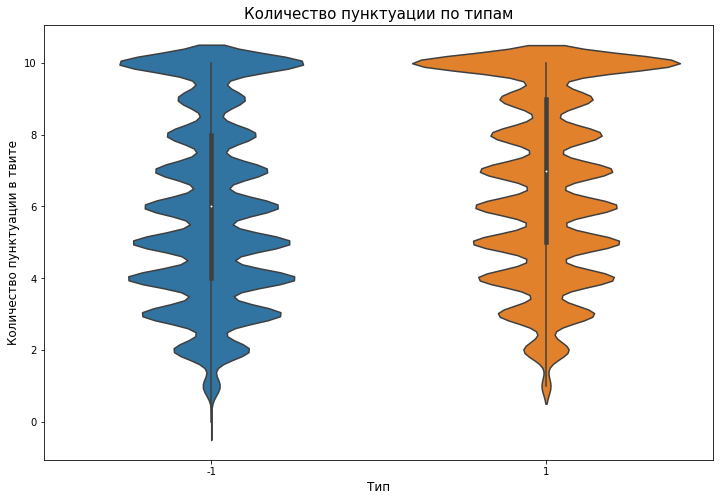

In [24]:
data['num_punctuations'].loc[data['num_punctuations']>10] = 10 #truncation for better visuals
plt.figure(figsize=(12,8))
sns.violinplot(x='type', y='num_punctuations', data=data)
plt.xlabel('Тип', fontsize=12)
plt.ylabel('Количество пунктуации в твите', fontsize=12)
plt.title("Количество пунктуации по типам", fontsize=15)
plt.show()

### Добавление фичей


In [10]:
## Number of words in the text ##
data["num_words"] = data["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
data["num_unique_words"] = data["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
data["num_chars"] = data["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
data["num_stopwords"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in rus_stopwords]))

## Number of punctuations in the text ##
data["num_punctuations"] = data['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
data["num_words_upper"] = data["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
data["num_words_title"] = data["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
data["mean_word_len"] = data["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

## Number of bad words ##
data["num_bad_words"] = data["text"].apply(lambda x: bad(x))

## Number of good_smiles ##
data["num_happy_smiles"] = data["text"].apply(lambda x: happy_smiles(x))

## Number of sad_smiles ##
data["num_sad_smiles"] = data["text"].apply(lambda x: sad_smiles(x))

### RGBoost, посмотрим на метрики и feature importance

In [11]:
train = data.iloc[range(0, len(data), 2)]
test = data.iloc[range(1, len(data), 2)]

In [12]:
type_mapping_dict = {-1:0, 1:1}

train_y = train['type'].map(type_mapping_dict)

train_id = train['id_post'].values
test_id = test['id_post'].values

train["num_words"] = train["text"].apply(lambda x: len(str(x).split()))
test["num_words"] = test["text"].apply(lambda x: len(str(x).split()))
train["mean_word_len"] = train["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test["mean_word_len"] = test["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

cols_to_drop = ['text', 'id_post', 'date', 'author_name']
train_X = train.drop(cols_to_drop+['type'], axis=1)
test_X = test.drop(cols_to_drop+['type'], axis=1)

train_X.reset_index(inplace = True, drop = True)
train_y.reset_index(inplace = True, drop = True)

/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [13]:
def runXGB(train_X, train_y, test_X, test_y=None,
           test_X2=None, seed_val=0, child=1,
           colsample=1):
    
    param = {}
    param['objective'] = 'binary:logistic'
    #param['eta'] = 0.1
    param['max_depth'] = 3
    param['silent'] = 1
    param['eval_metric'] = "logloss"
    param['min_child_weight'] = child
    param['subsample'] = 0.8
    param['colsample_bytree'] = colsample
    param['seed'] = seed_val
    num_rounds = 500
    plst = list(param.items())
    
    xgtrain = xgb.DMatrix(train_X, label=train_y)
    xgtest = xgb.DMatrix(test_X, label=test_y)
    
    watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
    
    model = xgb.train(plst, xgtrain,
                      num_rounds,
                      watchlist,
                      early_stopping_rounds=50,
                      verbose_eval=0)
    
    pred_test_y = model.predict(xgtest, ntree_limit = model.best_ntree_limit)
    
    if test_X2 is not None:
        xgtest2 = xgb.DMatrix(test_X2)
        pred_test_y2 = model.predict(xgtest2, ntree_limit = model.best_ntree_limit)
    return pred_test_y, pred_test_y2, model

In [14]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
cv_scores = []
pred_full_test = 0
#pred_train = np.zeros([train_X.shape[0], 1])
pred_train = np.zeros(train_X.shape[0])

for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runXGB(dev_X, dev_y, val_X, val_y, test_X, seed_val=0)
    pred_full_test = pred_full_test + pred_test_y
    #pred_train[val_index,:] = pred_val_y
    pred_train[val_index] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))

/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future

Mean cv score :  0.030266398728810595


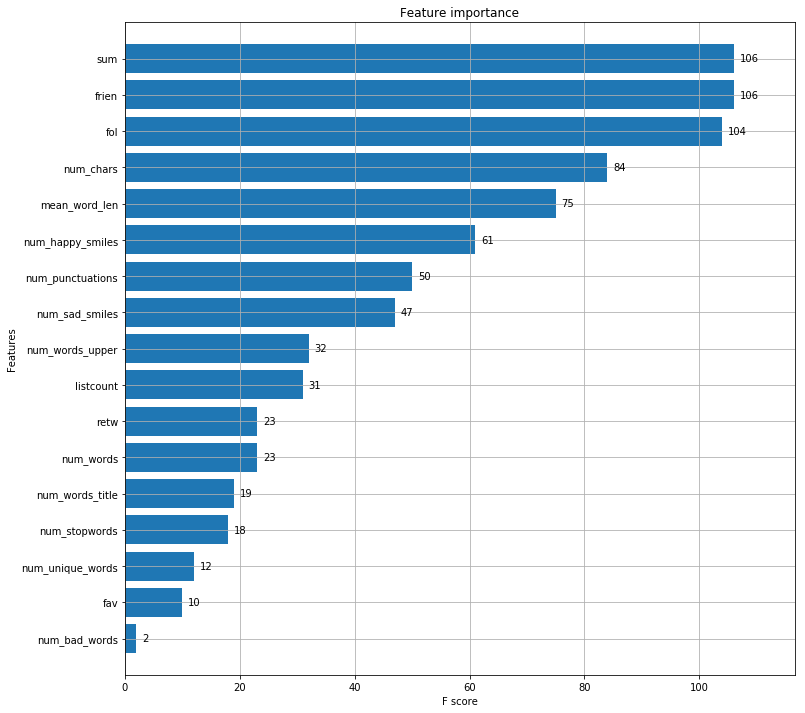

In [19]:
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [21]:
first = []
for i in pred_train:
    first.append(int(round(i)))
second = []
for i in train_y:
    second.append(i)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy', accuracy_score(first, second)) 
print('precision', precision_score(first, second)) 
print('recall', recall_score(first, second)) 
print('f1', f1_score(first, second))

accuracy 0.9861307046624815
precision 0.9830065359477124
recall 0.9895084038036422
f1 0.9862467540416007


In [28]:
type(rus_stopwords)

set

### Naive bayes

In [15]:
#w for w in str(x).lower().split() if w in rus_stopwords
tfidf_vec = TfidfVectorizer(rus_stopwords, ngram_range=(1,3))
full_tfidf = tfidf_vec.fit_transform(data['text'].values.tolist())
train_tfidf = tfidf_vec.transform(train['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test['text'].values.tolist())

In [16]:
def runMNB(train_X, train_y, test_X, test_y, test_X2):
    model = naive_bayes.BernoulliNB()
    model.fit(train_X, train_y)
    pred_test_y = model.predict_proba(test_X)
    pred_test_y2 = model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model

In [17]:
from sklearn import naive_bayes

In [18]:
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([data.shape[0], 2])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runMNB(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.

Mean cv score :  0.8126254460812413


Normalized confusion matrix
[[0.99 0.01]
 [0.02 0.98]]


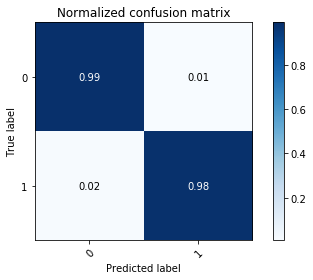

In [98]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)
# на диагонали - сколько правильно предсказали

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(val_y,pred, classes = ['0', '1'])
plt.show()

### SVD

In [77]:
n_comp = 5
svd_obj = TruncatedSVD(n_components=n_comp, algorithm='arpack')
svd_obj.fit(full_tfidf)
train_svd = pd.DataFrame(svd_obj.transform(train_tfidf))
test_svd = pd.DataFrame(svd_obj.transform(test_tfidf))
    
train_svd.columns = ['svd_word_'+str(i) for i in range(n_comp)]
test_svd.columns = ['svd_word_'+str(i) for i in range(n_comp)]
train1 = pd.concat([train, train_svd], axis=1, join = 'inner')
test1 = pd.concat([test, test_svd], axis=1, join = 'inner')
#del full_tfidf, train_tfidf, test_tfidf, train_svd, test_svd
#train1 = train.merge(train_svd, right_index = True, left_index = True)
#test1 = test.merge(test_svd, right_index = True, left_index = True)

In [78]:
train1

,id_post,date,author_name,text,type,reply,retw,fav,sum,fol,...,num_words_title,mean_word_len,num_bad_words,num_happy_smiles,num_sad_smiles,svd_word_0,svd_word_1,svd_word_2,svd_word_3,svd_word_4
0,421335680766050304,1389289228,DamutsHelen,@JMozyrets о госпоодиии...что со мной таке.Юляя(,-1,0,0,0,51,10,...,0,7.166667,0,0,1,0.020181,-0.019548,-0.005918,0.000681,-0.026444
2,410040569881456641,1386596264,KiraKosmos,"Один из самых лучших дней:) / Фильм шикарен , ...",1,0,0,0,404,25,...,4,5.500000,0,1,0,0.011340,-0.009086,-0.002134,-0.001103,-0.002732
4,417273280702078977,1388320677,QueenKarhi,@mmott23 ой маммамия...так далеко...и ножки эт...,-1,0,0,0,9144,288,...,0,8.000000,0,0,1,0.042498,0.047670,0.000898,-0.009020,-0.000342
6,409290573305360384,1386417451,viktor_shigorev,"@abakanlondon когда я спрашивал где это, я ока...",1,0,0,0,1264,219,...,0,4.916667,0,1,0,0.033712,-0.025276,-0.007651,-0.009525,0.024635
8,415800885705732097,1387969631,InnaJP,"Семимильными шагами догоняют ""National Enquire...",-1,0,0,0,6452,125,...,6,7.687500,0,0,1,0.084225,0.050652,-0.004632,-0.027510,0.024471
10,424484208245874688,1390039896,Nastya19032000,все меня в чём-то обвиняют разве я такая плохая?(,-1,0,0,0,202,9,...,0,4.555556,0,0,1,0.040617,-0.036923,-0.001510,-0.016648,0.026405
12,416223131448393728,1388070302,MaryNu2,"@RealVladimirSh я не жду новый год вообще, нас...",-1,0,0,0,1618,106,...,0,6.200000,0,0,1,0.014361,-0.012251,-0.003003,0.003545,-0.019252
14,409051065720782849,1386360348,E_Korshunova,RT @Bashirova_A: @E_Korshunova ухахахахаах.вот...,1,0,1,0,3685,121,...,2,7.812500,0,1,0,0.076100,-0.079298,-0.022384,-0.026683,-0.019188
16,410038659631816704,1386595809,Marmelad0,Почему не появляется новых фотографий?:) — а з...,1,0,0,0,2226,28,...,1,6.363636,0,1,0,0.068928,0.015407,-0.006485,-0.021891,0.025918
18,409321189119893504,1386424750,XooCoH,"RT @buyanaa_ts: Тал нутгийн үзэсгэлэн :) ""Хеер...",1,0,25,0,40250,4993,...,3,6.750000,0,1,0,0.030554,-0.024117,-0.005400,-0.005198,0.016112


In [79]:
cols_to_drop = ['text', 'id_post', 'date', 'author_name']
train_X = train1.drop(cols_to_drop+['type'], axis=1)
test_X = test1.drop(cols_to_drop+['type'], axis=1)


In [83]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train1.shape[0]])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runXGB(dev_X, dev_y, val_X, val_y, test_X, seed_val=0)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
    break
print("cv scores : ", cv_scores)

/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


cv scores :  [0.6775784666433712]


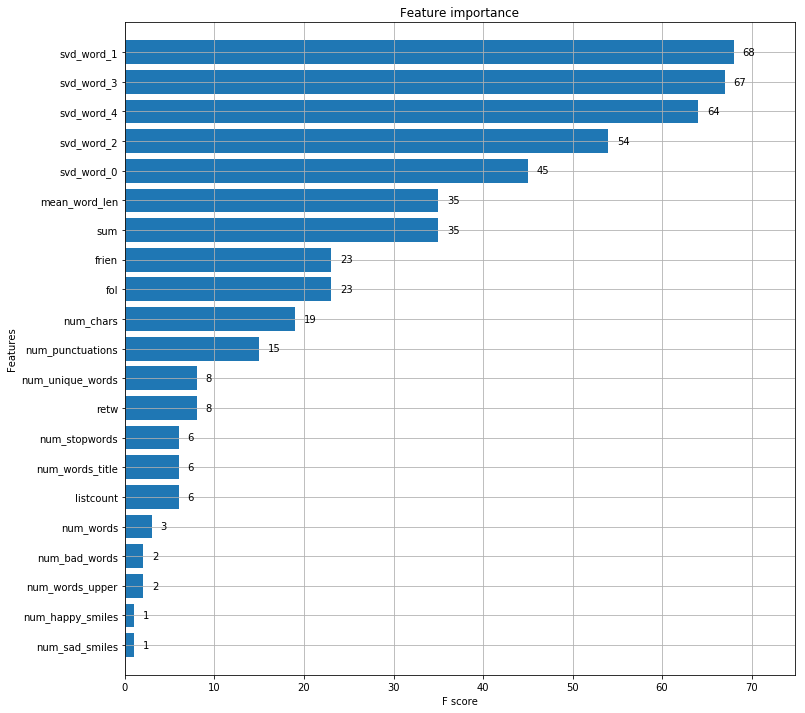

In [84]:
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

### Без фичей twitter

In [55]:
trainn = train.drop(['reply', 'retw', 'fav', 'sum', 'fol', 'frien', 'listcount'], axis = 1)
testt = test.drop(['reply', 'retw', 'fav', 'sum', 'fol', 'frien', 'listcount'], axis = 1)

In [56]:
type_mapping_dict = {-1:0, 1:1}

train_y = trainn['type'].map(type_mapping_dict)

train_id = trainn['id_post'].values
test_id = testt['id_post'].values

trainn["num_words"] = trainn["text"].apply(lambda x: len(str(x).split()))
testt["num_words"] = testt["text"].apply(lambda x: len(str(x).split()))
trainn["mean_word_len"] = trainn["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
testt["mean_word_len"] = testt["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

cols_to_drop = ['text', 'id_post', 'date', 'author_name']
train_X = trainn.drop(cols_to_drop+['type'], axis=1)
test_X = testt.drop(cols_to_drop+['type'], axis=1)

train_X.reset_index(inplace = True, drop = True)
train_y.reset_index(inplace = True, drop = True)

In [57]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
cv_scores = []
pred_full_test = 0
#pred_train = np.zeros([train_X.shape[0], 1])
pred_train = np.zeros(train_X.shape[0])

for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index], train_X.loc[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runXGB(dev_X, dev_y, val_X, val_y, test_X, seed_val=0)
    pred_full_test = pred_full_test + pred_test_y
    #pred_train[val_index,:] = pred_val_y
    pred_train[val_index] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))

/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future

Mean cv score :  0.03320352753881211


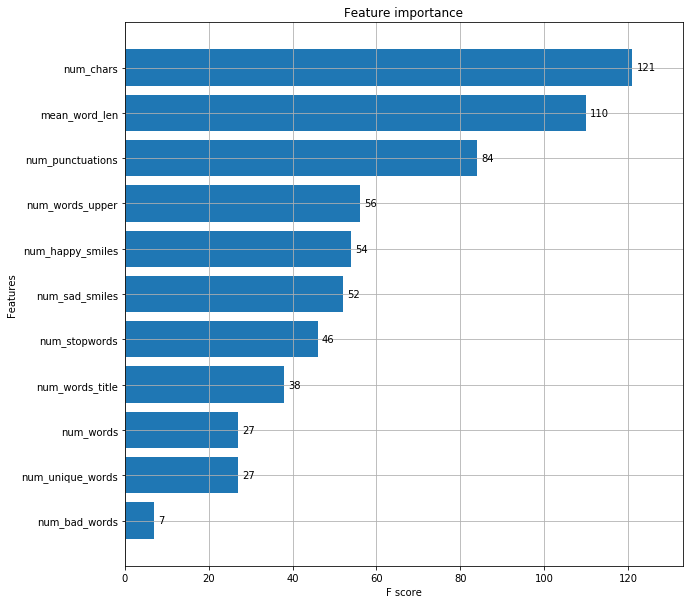

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [175]:
df = pd.DataFrame(['хаха самое хорошее что случилось в моей жизни - этот проект!)))', 'о... нет, мне так грустно, все очень плохо)))'], columns=['text'])

In [176]:
## Number of words in the text ##
df["num_words"] = df["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df["num_unique_words"] = df["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df["num_chars"] = df["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df["num_stopwords"] = df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in rus_stopwords]))

## Number of punctuations in the text ##
df["num_punctuations"] = df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
df["num_words_upper"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
df["num_words_title"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
df["mean_word_len"] = df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

## Number of bad words ##
df["num_bad_words"] = df["text"].apply(lambda x: bad(x))

## Number of good_smiles ##
df["num_happy_smiles"] = df["text"].apply(lambda x: happy_smiles(x))

## Number of sad_smiles ##
df["num_sad_smiles"] = df["text"].apply(lambda x: sad_smiles(x))

## Number of all smiles ##
#df["num_smiles"] = df["text"].apply(lambda x: int(happy_smiles(x))+int(sad_smiles(x)))

In [177]:
df

,text,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len,num_bad_words,num_happy_smiles,num_sad_smiles
0,хаха самое хорошее что случилось в моей жизни ...,11,11,63,3,5,0,0,4.818182,0,1,0
1,"о... нет, мне так грустно, все очень плохо)))",8,8,45,3,8,0,0,4.750000,0,1,0


In [178]:
df = df.drop(['text'], axis = 1)

In [179]:
df

,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len,num_bad_words,num_happy_smiles,num_sad_smiles
0,11,11,63,3,5,0,0,4.818182,0,1,0
1,8,8,45,3,8,0,0,4.750000,0,1,0


In [180]:
xgtes = xgb.DMatrix(df)

In [181]:
f = model.predict(xgtes, ntree_limit = model.best_ntree_limit)

In [182]:
f

array([0.9980349, 0.0179223], dtype=float32)

In [183]:
for i in f:
    print(int(round(i)))

1
0


# Выводы

#### 1) logloss крайне сильно штрафует за уверенность классификатора в неверном ответе

#### 2) наши данные, видимо, собраны примерно по тем же признакам, которые мы смотрели

#### 3)  с помощью модели можно достаточно успешно предсказывать позитивность и негативности без фичей twitter

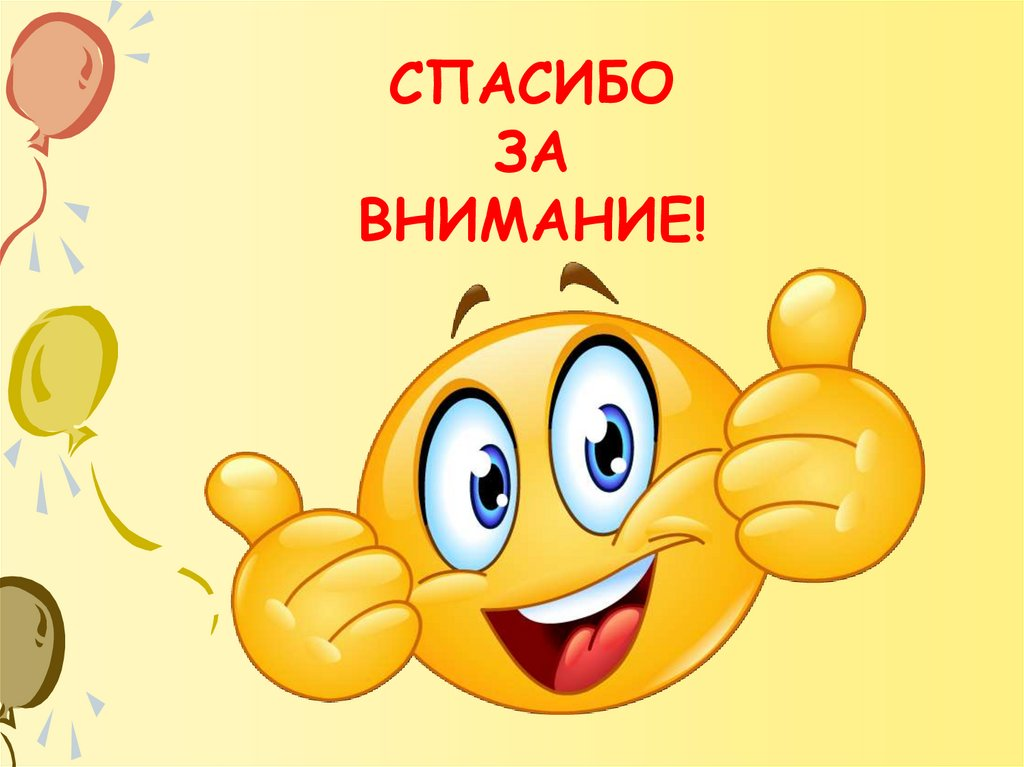

In [127]:
from IPython.display import Image
Image(filename='final.jpg', width=700)